## Pedestrian Detection using OpenCV inbuilt library
Code Source
https://www.pyimagesearch.com/2015/11/09/pedestrian-detection-opencv/

In [1]:
# import the necessary packages
from __future__ import print_function
from imutils.object_detection import non_max_suppression
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
from skvideo.io import FFmpegWriter 

## Detection on Video
Output will be a video

In [8]:
import time

def pedestrian_detection(input_video, outfile, fps=30):
    vidcap = cv2.VideoCapture(input_video)
   
    writer = FFmpegWriter(outfile, outputdict={'-r': fps})
    writer = FFmpegWriter(outfile)
    
    # initialize the HOG descriptor/person detector
    hog = cv2.HOGDescriptor()
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
    start_time = time.time()
    i = 0
    while True:
        ret, image = vidcap.read()
        if not ret: break
        i += 1
        image = imutils.resize(image, width=(image.shape[1]))
        orig = image.copy()

        # detect people in the image
        (rects, weights) = hog.detectMultiScale(image, winStride=(4, 4), padding=(8, 8), scale=1.05)
        
        # draw the original bounding boxes
        for (x, y, w, h) in rects:
            cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 2)

        # apply non-maxima suppression to the bounding boxes using a
        # fairly large overlap threshold to try to maintain overlapping
        # boxes that are still people
        rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
        pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)
        
        # draw the final bounding boxes
        for (xA, yA, xB, yB) in pick:
            cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 2)
            print ("Found human in frame", i)
        writer.writeFrame(image)
    print("--- %s seconds ---" % (time.time() - start_time))
    writer.close()

In [9]:
pedestrian_detection('../../videos/uber_trimmed.mp4', './opencv-ped-detect.mp4')

Found human in frame 1
Found human in frame 2
Found human in frame 3
Found human in frame 4
Found human in frame 5
Found human in frame 9
Found human in frame 10
Found human in frame 11
Found human in frame 15
Found human in frame 16
Found human in frame 17
Found human in frame 18
Found human in frame 19
Found human in frame 19
Found human in frame 27
Found human in frame 28
Found human in frame 40
Found human in frame 42
Found human in frame 43
Found human in frame 47
Found human in frame 48
Found human in frame 49
Found human in frame 50
Found human in frame 52
Found human in frame 61
Found human in frame 62
Found human in frame 63
Found human in frame 64
Found human in frame 65
Found human in frame 65
Found human in frame 66
Found human in frame 75
Found human in frame 76
Found human in frame 79
Found human in frame 81
Found human in frame 85
Found human in frame 86
Found human in frame 86
Found human in frame 86
Found human in frame 87
Found human in frame 88
Found human in frame 8

## Detection on Images

In [4]:
#src = '../PedestrianPhotos-Orig/'
#dest = '../PedestrainPhotos-Boxes/'

src='../Frames/'
dest='../FramesPed-Boxes/'
# initialize the HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [3]:
def run_hog_detector(src, dest):
    # loop over the image paths
    for imagePath in src:
        print (imagePath)
        # load the image and resize it to (1) reduce detection time
        # and (2) improve detection accuracy
        image = cv2.imread(imagePath)
        image = imutils.resize(image, width=min(400, image.shape[1]))
        orig = image.copy()

        # detect people in the image
        (rects, weights) = hog.detectMultiScale(image, winStride=(4, 4),
            padding=(8, 8), scale=1.05)

        # draw the original bounding boxes
        for (x, y, w, h) in rects:
            cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 2)

        # apply non-maxima suppression to the bounding boxes using a
        # fairly large overlap threshold to try to maintain overlapping
        # boxes that are still people
        rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
        pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)

        # draw the final bounding boxes
        for (xA, yA, xB, yB) in pick:
            cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 2)

        # show some information on the number of bounding boxes
        filename = "hog_" + imagePath
        print("[INFO] {}: {} original boxes, {} after suppression".format(
            filename, len(rects), len(pick)))

        # show the output images
        #cv2.imwrite('%s.jpg' %filename , image)
        cv2.imwrite(('{0}{1}').format(dest, filename), image)

In [22]:
run_hog_detector(["night_ped_5.jpg"], "./")

night_ped_5.jpg
[INFO] hog_night_ped_5.jpg: 4 original boxes, 3 after suppression


## Convert the sequential images to video

In [10]:
def images_seq_to_video(input_folder, outfile, count, fps=30):
    writer = FFmpegWriter(outfile, outputdict={'-r': fps})
    writer = FFmpegWriter(outfile)
    
    for i in range(count):
        image = input_folder + 'frame'+ str(i)+'.jpg'
        f = cv2.imread(image)
        plt.imshow(f)
        writer.writeFrame(f)
    writer.close()

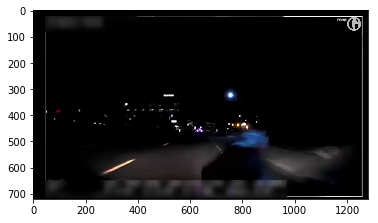

In [11]:
input_folder = '../Frames/'
outfile = 'uber_opencv_pedestrian_detection.mp4'
images_seq_to_video(input_folder, outfile, 166)